##                                            **Student Job Profile Classification using Machine Learning**

# Group 9
**Group Members :**

1) Laxmikanth Reddy Jitta

2) Likitha Reddy Kotla

3) Sahithi Anchula

## CS 616-CO

DATA SET LINK : https://www.kaggle.com/datasets/yuvjeetarora/student-job-profile


## CLASSIFICATION


### Target column : Profile

### Feautures used in algorithms

1) DSA : score in Data Structures and Algorithms

2) DBMS :score in Database Management Systems

3) OS: score in Operating Systems

4) CN : score in Computer Networks

5) Mathemetics : score in Mathematical skills

6) Aptitute : score in General aptitude

7) Comm : score in Communication skills

8) Problem Solving : score in Problem-solving abilities

9) Creative : score in Creativity level

10) Hackathons : Participation in hackathons

11) Skill : technical skill


## IMPORTING REQUIRED PACKAGES
## STEP1-READING THE DATA

In [1]:
#reading the data
import pandas as pd
import timeit
df = pd.read_csv("Student Placement.csv")


Shape():The shape method is often used with arrays. It returns a tuple representing the dimensions of the array.

In [2]:
#gives total rows and columns
df.shape

(707, 12)

Describe(): The describe method is often used with data frames. It provides summary statistics of the numerical columns in the data frame

In [3]:
#gives statistical output of all the colummns
df.describe()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,60.981612,64.224894,64.495050,58.698727,49.946252,56.231966,69.254597,5.471004,6.151344,3.100424
std,23.835685,26.251595,23.475825,24.828101,29.690518,23.870756,11.236334,2.362405,1.888839,2.594358
min,5.000000,5.000000,5.000000,5.000000,0.000000,13.000000,40.000000,1.000000,2.000000,0.000000
25%,45.000000,41.000000,53.000000,38.500000,22.500000,35.000000,62.000000,4.000000,5.000000,1.000000
50%,67.000000,76.000000,73.000000,62.000000,48.000000,60.000000,71.000000,6.000000,6.000000,3.000000
75%,80.000000,85.000000,82.500000,80.000000,78.000000,77.000000,78.000000,7.000000,7.000000,5.000000
max,99.000000,100.000000,95.000000,100.000000,99.000000,99.000000,90.000000,10.000000,10.000000,10.000000


## DISPLAYING FIRST 5 ROWS

In [4]:
#Gives first 5 columns and you can pass the value number of rows that you want to display
df.head()

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,Skill,Profile
0,49,22,41,26,7,28,61,1,8,3,Javascript,UI/UX
1,39,46,45,47,3,35,65,4,10,4,HTML/CSS,UI/UX
2,28,32,45,35,10,23,85,3,10,3,Photoshop,UI/UX
3,52,38,33,38,19,27,62,1,9,3,Photoshop,UI/UX
4,23,31,30,38,10,13,72,4,8,5,HTML/CSS,UI/UX


In [5]:
#provides summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DSA              707 non-null    int64 
 1   DBMS             707 non-null    int64 
 2   OS               707 non-null    int64 
 3   CN               707 non-null    int64 
 4   Mathmetics       707 non-null    int64 
 5   Aptitute         707 non-null    int64 
 6   Comm             707 non-null    int64 
 7   Problem Solving  707 non-null    int64 
 8   Creative         707 non-null    int64 
 9   Hackathons       707 non-null    int64 
 10  Skill            707 non-null    object
 11  Profile          707 non-null    object
dtypes: int64(10), object(2)
memory usage: 66.4+ KB


## CHECKING FOR NULL VALUES

In [6]:
#Displays sum of missing values in each column
df.isnull().sum()

DSA                0
DBMS               0
OS                 0
CN                 0
Mathmetics         0
Aptitute           0
Comm               0
Problem Solving    0
Creative           0
Hackathons         0
Skill              0
Profile            0
dtype: int64

## BAR CHART - PROFILE

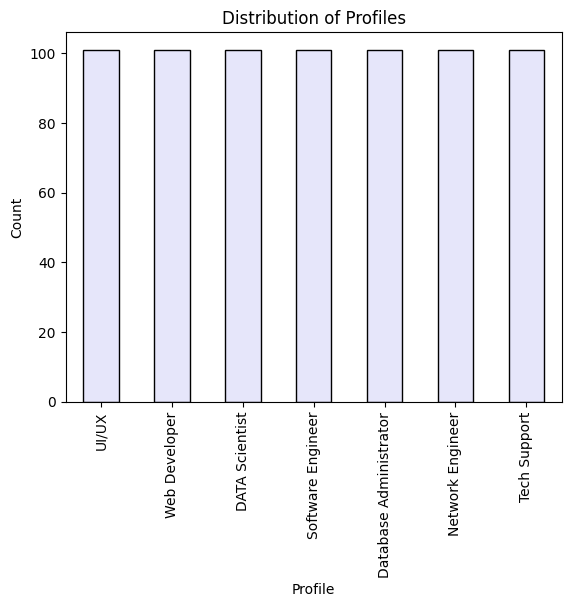

In [7]:
import matplotlib.pyplot as plt

# Plotting a bar chart for the 'Profile' column
profile_counts = df['Profile'].value_counts()
profile_counts.plot(kind='bar', color='lavender', edgecolor='black')

#labels and title
plt.xlabel('Profile')
plt.ylabel('Count')
plt.title('Distribution of Profiles')

plt.show()

## BAR PLOT - SKILLS

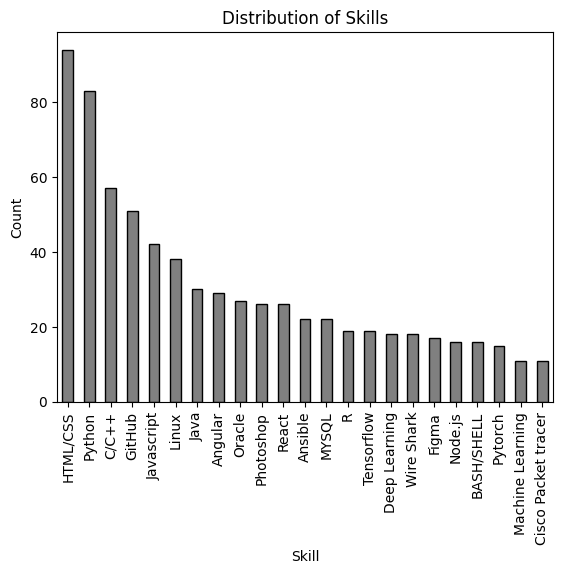

In [8]:
import matplotlib.pyplot as plt

# Plotting a bar chart for the 'Profile' column
profile_counts = df['Skill'].value_counts()
profile_counts.plot(kind='bar', color='grey', edgecolor='black')

#labels and title
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title('Distribution of Skills')

plt.show()

## HISTOGRAM

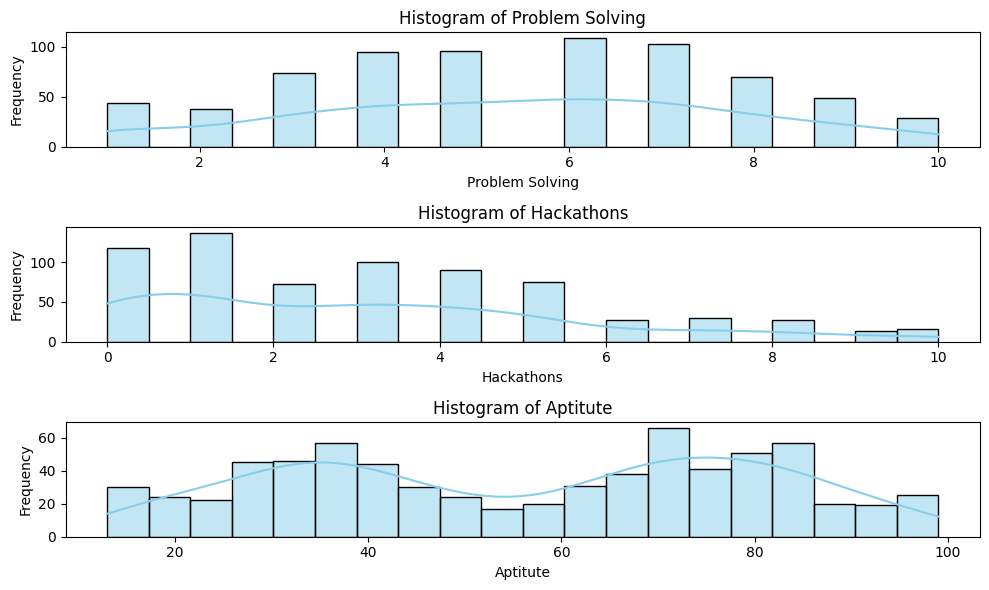

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn library

numeric_columns = [ 'Problem Solving', 'Hackathons','Aptitute']
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df, x=column, bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## STEP2- KNEIGHBOURS CLASSIFIER AND SDG CLASSIFIER

The KNeighborsClassifier is a type of machine learning algorithm used for classification tasks. Instead of explicitly learning a function to make predictions, it makes predictions based on the majority class of its k nearest neighbors.



##  KNEIGHBOURS CLASSIFIER

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
tic=timeit.default_timer() # start timer before training

# 'Profile' is the target variable and other columns are features
X = df.drop(['Profile'], axis=1)  # Features
y = df['Profile']  # Target variable


## ONE HOT ENCODING

In [11]:
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=['Skill'])
X_encoded

,DSA,DBMS,OS,CN,Mathmetics,Aptitute,Comm,Problem Solving,Creative,Hackathons,...,Skill_Machine Learning,Skill_Node.js,Skill_Oracle,Skill_Photoshop,Skill_Python,Skill_Pytorch,Skill_R,Skill_React,Skill_Tensorflow,Skill_Wire Shark
0,49,22,41,26,7,28,61,1,8,3,...,0,0,0,0,0,0,0,0,0,0
1,39,46,45,47,3,35,65,4,10,4,...,0,0,0,0,0,0,0,0,0,0
2,28,32,45,35,10,23,85,3,10,3,...,0,0,0,1,0,0,0,0,0,0
3,52,38,33,38,19,27,62,1,9,3,...,0,0,0,1,0,0,0,0,0,0
4,23,31,30,38,10,13,72,4,8,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,17,32,18,11,7,40,60,2,6,1,...,0,0,0,0,1,0,0,0,0,0
703,7,22,25,33,8,29,71,3,5,0,...,0,0,0,0,1,0,0,0,0,0
704,35,5,13,20,17,45,55,3,5,1,...,0,0,0,0,1,0,0,0,0,0
705,16,28,6,7,18,33,67,3,4,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the 'n_neighbors' parameter

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
Knn_accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)


## CONFUSION MATRIX - KNN

In [22]:
# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[46  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 44  0  0  0]
 [ 0  0  0  0 34  1  0]
 [ 0  0  0  0  4 49  0]
 [ 0  0  0  0  0  0 37]]


## CLASSIFICATION REPORT - KNN

In [23]:
# classification report
print("Classification Report:\n", classification_report_result)

Classification Report:
                         precision    recall  f1-score   support

        DATA Scientist       1.00      1.00      1.00        46
Database Administrator       1.00      1.00      1.00        33
      Network Engineer       1.00      1.00      1.00        35
     Software Engineer       1.00      1.00      1.00        44
          Tech Support       0.89      0.97      0.93        35
                 UI/UX       0.98      0.92      0.95        53
         Web Developer       1.00      1.00      1.00        37

              accuracy                           0.98       283
             macro avg       0.98      0.99      0.98       283
          weighted avg       0.98      0.98      0.98       283



## ACCURACY AND TIME - KNN

In [24]:
# Evaluate the model
KNN_accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {KNN_accuracy}")

KNN_toc=timeit.default_timer() - tic # end timer after training
print("The train time in seconds: ", KNN_toc)

Accuracy: 0.9823321554770318
The train time in seconds:  102.871139702


## SGD CLASSIFIER()
SGD is an optimization algorithm used to minimize an objective function, such as the loss function in a machine learning model. It works by iteratively updating the parameters of the model in the direction that reduces the loss, typically by taking small steps proportional to the negative gradient of the loss function.

In [25]:
#imoorting all required modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
tic=timeit.default_timer() # start timer before training


# 'Profile' is the target variable and other columns are features
X = df.drop(['Profile'], axis=1)  # Features
y = df['Profile']  # Target variable

X_encoded = pd.get_dummies(X, columns=['Skill'])



In [26]:
# Standardize numerical features
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Encode target variable 'Profile'
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_encoded, test_size=0.4, random_state=82)

# Initialize the SGDClassifier
sgd_classifier = SGDClassifier(max_iter=1000, random_state=42)

# Fit the model to the training data
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
SDG_accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

## CONFUSION MATRIX - SGD

In [28]:
# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[41  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0]
 [ 0  0 42  0  0  0  0]
 [ 0  0  2 41  0  0  0]
 [ 0  0  0  0 39  0  0]
 [ 0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0 42]]


## CLASSIFICATION REPORT - SGD

In [29]:
# Output classification results
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34
           2       0.95      1.00      0.98        42
           3       1.00      0.95      0.98        43
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        42

    accuracy                           0.99       283
   macro avg       0.99      0.99      0.99       283
weighted avg       0.99      0.99      0.99       283



## ACCURACY AND TIME - SGD

In [30]:
print(f"Accuracy: {SDG_accuracy}")
SGD_toc=timeit.default_timer() - tic # end timer after training

print("The train time in seconds: ", SGD_toc)

Accuracy: 0.9929328621908127
The train time in seconds:  12.865021911999975


## STEP3-DECISION TREE CLASSIFIER
A Decision Tree Classifier is a specific implementation of the Decision Tree algorithm tailored for classification tasks. It builds a tree structure to classify instances into multiple classes based on their features. Here's how it works

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
tic=timeit.default_timer() # start timer before training

#'Profile' is the target variable and other columns are features
X = df.drop(['Profile'], axis=1)  # Features
y = df['Profile']  # Target variable

# Drop non-numeric columns for simplicity (adjust as needed)
#X_numeric = X.select_dtypes(include='number')
X_encoded = pd.get_dummies(X, columns=['Skill'])

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=78)

# Initialize the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
DCT_accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

## CONFUSION MATRIX - DCT

In [33]:
# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[41  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 41  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0 38]]


## CLASSIFICATION REPORT - DCT

In [34]:
# Output the results
print("Classification Report:\n", classification_report_result)

Classification Report:
                         precision    recall  f1-score   support

        DATA Scientist       1.00      1.00      1.00        41
Database Administrator       1.00      1.00      1.00        45
      Network Engineer       1.00      1.00      1.00        35
     Software Engineer       1.00      1.00      1.00        41
          Tech Support       1.00      1.00      1.00        42
                 UI/UX       1.00      1.00      1.00        41
         Web Developer       1.00      1.00      1.00        38

              accuracy                           1.00       283
             macro avg       1.00      1.00      1.00       283
          weighted avg       1.00      1.00      1.00       283



## ACCURACY AND TIME - DCT

In [35]:
DCT_toc=timeit.default_timer() - tic # end timer after training
print(f"Accuracy: {DCT_accuracy}")
print("The train time in seconds: ", DCT_toc)

Accuracy: 1.0
The train time in seconds:  9.992431327999952


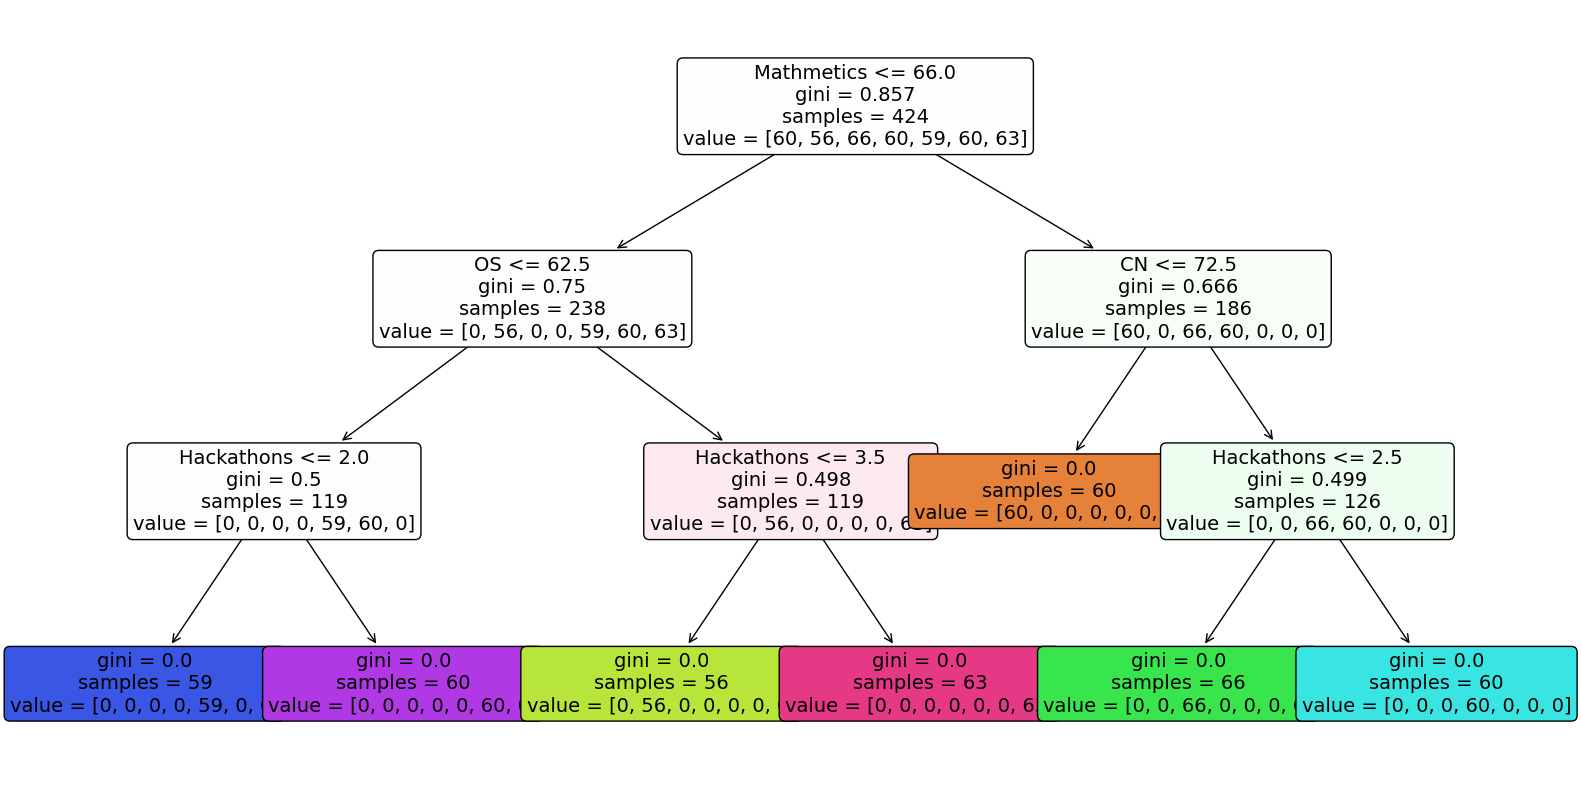

In [36]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt

# Defining the feature names
feature_names = ['DSA',
 'DBMS',
 'OS',
 'CN',
 'Mathmetics',
 'Aptitute',
 'Comm',
 'Problem Solving',
 'Creative',
 'Hackathons',
 'Skill_Angular',
 'Skill_Ansible',
 'Skill_BASH/SHELL',
 'Skill_C/C++',
 'Skill_Cisco Packet tracer',
 'Skill_Deep Learning',
 'Skill_Figma',
 'Skill_GitHub',
 'Skill_HTML/CSS',
 'Skill_Java',
 'Skill_Javascript',
 'Skill_Linux',
 'Skill_MYSQL',
 'Skill_Machine Learning',
 'Skill_Node.js',
 'Skill_Oracle',
 'Skill_Photoshop',
 'Skill_Python',
 'Skill_Pytorch',
 'Skill_R',
 'Skill_React',
 'Skill_Tensorflow',
 'Skill_Wire Shark']

dct_classifier = DecisionTreeClassifier()
dct_classifier.fit(X_train, y_train)


# Plotting the decision tree
plt.figure(figsize=(20, 10))
decision_tree_plot = plot_tree(dct_classifier,
                               feature_names=feature_names,
                               filled=True, rounded=True,
                               fontsize=14)
plt.show()

## RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier
# grow a random forest with 500 trees and 3 randomly chosen attributes
rf_classifier = RandomForestClassifier(n_estimators=500, criterion='gini', max_features= 3, bootstrap=True, oob_score=True)
rf_tic = timeit.default_timer()
rf_classifier.fit(X_train, y_train)
rf_toc = timeit.default_timer() - rf_tic
rf_y_pred = rf_classifier.predict(X_test)

# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, rf_y_pred)
print(conf)
RF_accuracy = accuracy_score(y_test, rf_y_pred)

classification_report_result = classification_report(y_test, rf_y_pred )

[[41  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 41  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0 38]]


## CLASSIFICATION REPORT -  RANDOM FOREST

In [38]:
print("Classification Report:\n", classification_report_result)

Classification Report:
                         precision    recall  f1-score   support

        DATA Scientist       1.00      1.00      1.00        41
Database Administrator       1.00      1.00      1.00        45
      Network Engineer       1.00      1.00      1.00        35
     Software Engineer       1.00      1.00      1.00        41
          Tech Support       1.00      1.00      1.00        42
                 UI/UX       1.00      1.00      1.00        41
         Web Developer       1.00      1.00      1.00        38

              accuracy                           1.00       283
             macro avg       1.00      1.00      1.00       283
          weighted avg       1.00      1.00      1.00       283



## ACCURACY AND TIME

In [39]:
print('RF Accuracy: ', RF_accuracy)
print('RF Time: ', rf_toc)

RF Accuracy:  1.0
RF Time:  0.9796109350000393


## STEP4-XGB CLASSIFIER

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Import XGBoost classifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Use the same label encoder to transform the test data
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier to the training data
xgb_classifier.fit(X_train, y_train_encoded)

# Predict on test data

xgb_y_pred = xgb_classifier.predict(X_test)
xgb_tic = timeit.default_timer()

xgb_toc = timeit.default_timer() - xgb_tic


## CONFUSION MATRIX - XGB CLASSIFIER

In [41]:
# Calculate confusion matrix
conf = confusion_matrix(y_test_encoded, xgb_y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf)

Confusion Matrix:
[[41  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0]
 [ 2  0 30  3  0  0  0]
 [ 0  0  0 41  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0 38]]


## CLASSIFICATION REPORT - XGB

In [42]:
#classification report
classification_report_result = classification_report(y_test_encoded, xgb_y_pred)

print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      1.00      1.00        45
           2       1.00      0.86      0.92        35
           3       0.93      1.00      0.96        41
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        38

    accuracy                           0.98       283
   macro avg       0.98      0.98      0.98       283
weighted avg       0.98      0.98      0.98       283



## ACCURACY AND TIME

In [43]:
# Calculating accuracy
XGB_accuracy = accuracy_score(y_test_encoded, xgb_y_pred)
print('XGB Accuracy:', XGB_accuracy)

# training time
print('XGB Time:', xgb_toc)

XGB Accuracy: 0.9823321554770318
XGB Time: 5.724999999756619e-05


## STEP5-ADA BOOST AND STACKING CLASSIFIER

## ADABOOSTCLASSIFIER()

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
ada_classifier = AdaBoostClassifier(estimator=GaussianNB())
ada_tic = timeit.default_timer()
ada_classifier.fit(X_train, y_train)
ADA_toc = timeit.default_timer() - ada_tic
ada_y_pred = ada_classifier.predict(X_test)
# gives the confusion matrix
classification_report_result = classification_report(y_test, ada_y_pred )

## CONFUSION MATRIX - ADA

In [45]:
conf = metrics.confusion_matrix(y_test, ada_y_pred)
print(conf)

[[41  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  5  0 36  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0 38]]


## CLASSIFICATION REPORT - ADA

In [46]:
print("Classification Report:\n", classification_report_result)

Classification Report:
                         precision    recall  f1-score   support

        DATA Scientist       1.00      1.00      1.00        41
Database Administrator       0.90      1.00      0.95        45
      Network Engineer       1.00      1.00      1.00        35
     Software Engineer       1.00      0.88      0.94        41
          Tech Support       1.00      1.00      1.00        42
                 UI/UX       1.00      1.00      1.00        41
         Web Developer       1.00      1.00      1.00        38

              accuracy                           0.98       283
             macro avg       0.99      0.98      0.98       283
          weighted avg       0.98      0.98      0.98       283



## ACCURACY AND TIME

In [47]:
ADA_accuracy = accuracy_score(y_test, ada_y_pred)
print('ADA Accuracy: ', ADA_accuracy)
print('ADA Time: ', ADA_toc)

ADA Accuracy:  0.9823321554770318
ADA Time:  0.1409126710000237


## STACKING CLASSIFIER

In [48]:
# Stacking classifier
from sklearn.ensemble import StackingClassifier

# Base models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [49]:
# Create a list of base models

estimators = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC()),
    ('rfc', RandomForestClassifier()),
]

## CONFUSION MATRIX - STACKING CLASSIFIER

In [50]:
st_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

# Fit the model
st_tic = timeit.default_timer()
st_classifier = st_classifier.fit(X_train, y_train)
st_toc = timeit.default_timer() - st_tic
st_y_pred = st_classifier.predict(X_test)
# gives the confusion matrix
conf = metrics.confusion_matrix(y_test, st_y_pred)
print(conf)
classification_report_result = classification_report(y_test, st_y_pred )

[[41  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  0 41  0  0  0]
 [ 0  0  0  0 42  0  0]
 [ 0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0 38]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## CLASSSIFICATION REPORT - STACKING CLASSIFIER

In [51]:
print("Classification Report:\n", classification_report_result)

Classification Report:
                         precision    recall  f1-score   support

        DATA Scientist       1.00      1.00      1.00        41
Database Administrator       1.00      1.00      1.00        45
      Network Engineer       1.00      1.00      1.00        35
     Software Engineer       1.00      1.00      1.00        41
          Tech Support       1.00      1.00      1.00        42
                 UI/UX       1.00      1.00      1.00        41
         Web Developer       1.00      1.00      1.00        38

              accuracy                           1.00       283
             macro avg       1.00      1.00      1.00       283
          weighted avg       1.00      1.00      1.00       283



## ACCURACY AND TIME

In [52]:
ST_accuracy = accuracy_score(y_test, st_y_pred)
print('ST Accuracy: ', ST_accuracy)
print('ST Time: ', st_toc)

ST Accuracy:  1.0
ST Time:  0.874719056999993


## COMPARING MODEL ACCURACY

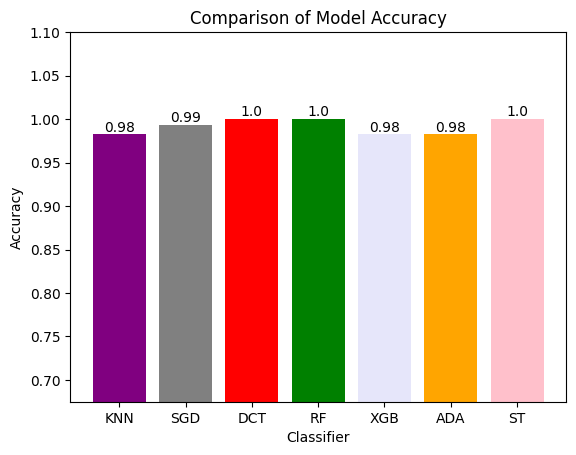

In [53]:
#compare the resulting accuracies
import matplotlib.pyplot as plt
accuracy_scores = [KNN_accuracy, SDG_accuracy, DCT_accuracy, RF_accuracy, XGB_accuracy, ADA_accuracy, ST_accuracy]
classifier_names = ['KNN', 'SGD', 'DCT', 'RF', 'XGB', 'ADA', 'ST']

#plt.bar(classifier_names, accuracy_scores
bars = plt.bar(classifier_names, accuracy_scores,color=['purple', 'grey', 'red', 'green', 'lavender', 'orange', 'pink'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy")
plt.ylim(0.675, 1.1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')
plt.show()
# Model Accuracy conclusion

## COMPARING MODEL EXECUTION TIME

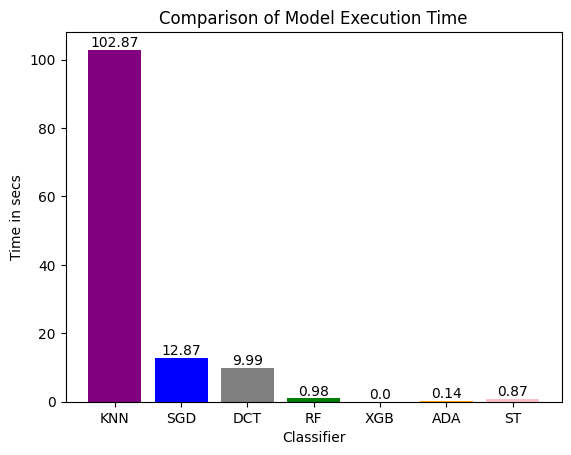

In [54]:
#compare the resulting accuracies
time = [KNN_toc, SGD_toc, DCT_toc, rf_toc, xgb_toc, ADA_toc, st_toc]
classifier_names = ['KNN', 'SGD', 'DCT', 'RF', 'XGB', 'ADA', 'ST']

#plt.bar(classifier_names, accuracy_scores
bars = plt.bar(classifier_names, time, color=['purple', 'blue', 'grey', 'green', 'lavender', 'orange', 'pink'])
plt.xlabel("Classifier")
plt.ylabel("Time in secs")
plt.title("Comparison of Model Execution Time")
#plt.ylim(0.675, 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')
plt.show()


## EFFICIENCY  SCORES

In [55]:
accuracy_scores = {'KNN': 0.98, 'SGD': 0.99, 'DCT': 1, 'RF': 1, 'XGB': 0.98, 'ADA': 0.98, 'ST': 1}
runtime_scores = {'KNN': 0.09, 'SGD': 0.05, 'DCT': 0.04, 'RF': 0.29, 'XGB': 0.01, 'ADA': 0.06, 'ST': 0.43}

weight_accuracy = 0.7  # Weight assigned to accuracy
weight_runtime = 0.3   # Weight assigned to runtime

efficiency_scores = {}

for classifier in accuracy_scores:
    efficiency_scores[classifier] = (weight_accuracy * accuracy_scores[classifier]) - (weight_runtime * runtime_scores[classifier])

# Sorting efficiency scores to find the best algorithm
sorted_efficiency_scores = sorted(efficiency_scores.items(), key=lambda x: x[1], reverse=True)

print("Efficiency Scores:")
for classifier, score in sorted_efficiency_scores:
    print(f"{classifier}: {score}")


Efficiency Scores:
DCT: 0.688
XGB: 0.6829999999999999
SGD: 0.6779999999999999
ADA: 0.6679999999999999
KNN: 0.6589999999999999
RF: 0.613
ST: 0.571


## CONCLUSION

**Missing Values:** Fortunately, the dataset did not have any missing values. Therefore, there was no need for imputation or handling missing data.


**Object Type Columns to Numeric:** All columns in the dataset were already numeric except the skill column.
We used one-hot encoding to convert categorical columns into numerical format. This technique is commonly used in machine learning to handle categorical data.
uses Pandas' get_dummies() function to perform one-hot encoding specifically on the 'Skill' column. This function creates binary columns for each category in the 'Skill' column, assigning a 1 if the category is present and a 0 otherwise.

**Object Type Columns to DateTime Object:** There were no columns in the dataset that needed to be converted to DateTime objects, as all features were related to job roles and did not involve temporal data.

**Duplicates:** There were no duplicate entries identified in the dataset, ensuring data integrity and consistency.


**Identifying the Best Performing Model:** Among the classification models evaluated (Decision Tree, Random Forest, SGD Classifier, XGB Classifier, AdaBoost, and Stacking Classifier), the Stacking Classifier emerged as the top-performing model with 100% accuracy with a relatively short training time compared to other models. This model outperformed the others in terms of predictive accuracy

In conclusion, the analysis revealed a clean dataset with no missing values or duplicates. The models achieved impressive accuracy scores, with the Stacking Classifier standing out as the best performer. Future work could involve further exploration of feature engineering techniques, hyperparameter tuning, and expanding the dataset to improve generalization capabilities. Below is the code snippet summarizing the models and their performances:

In [56]:
models = {
    "Decision Tree": (DCT_accuracy, DCT_toc),
    "Random Forest": (RF_accuracy, rf_toc),
    "SGD Classifier": (SDG_accuracy , SGD_toc),
    "XGB Classifier": (XGB_accuracy, xgb_toc),
    "AdaBoost": (ADA_accuracy, ADA_toc),
    "Stacking Classifier": (ST_accuracy, st_toc)
}

best_model = max(models, key=lambda key: models[key][0])

print("Best Performing Model:")
print(f"Model: {best_model}")
print(f"Accuracy: {models[best_model][0]}")
print(f"Training Time: {models[best_model][1]}")

Best Performing Model:
Model: Decision Tree
Accuracy: 1.0
Training Time: 9.992431327999952
